In [40]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import seaborn as sns
import matplotlib.pyplot as plt
import prince

In [41]:
data = pd.read_csv('HCMST_ver_3.04.csv')

In [42]:
df_features = data[['ppagecat', 'ppeducat', 'ppincimp', 'qflag', 'glbstatus', 'married', 'q24_met_online']] 
df_features.shape

(4002, 7)

In [43]:
df_cleaned = df_features.dropna()
df_cleaned.shape

(2934, 7)

In [44]:
df = df_cleaned.astype(int)
df.dtypes
df.head()

,ppagecat,ppeducat,ppincimp,qflag,glbstatus,married,q24_met_online
0,4,4,7,1,1,0,1
1,2,4,11,1,1,1,0
3,2,3,11,1,1,0,1
6,4,4,17,1,1,0,0
7,5,4,6,1,1,1,0


In [45]:
df = df_cleaned.astype(str)
df.dtypes

ppagecat          object
ppeducat          object
ppincimp          object
qflag             object
glbstatus         object
married           object
q24_met_online    object
dtype: object

In [46]:
# Ініціалізуємо MCA
mca = prince.MCA(n_components=2, random_state=42)

# Навчаємо MCA на даних
mca = mca.fit(df)

# Отримуємо зменшену вимірність (проекцію 2D)
mca_result = mca.transform(df)

# Додаємо отримані координати до DataFrame
df_mca = df.copy()
df_mca['MCA_1'] = mca_result[0]
df_mca['MCA_2'] = mca_result[1]

# Виводимо результат
print(df_mca.head())

  ppagecat ppeducat ppincimp qflag glbstatus married q24_met_online     MCA_1  \
0        4        4        7     1         1       0            1.0  1.070035   
1        2        4       11     1         1       1            0.0  0.253211   
3        2        3       11     1         1       0            1.0  1.025780   
6        4        4       17     1         1       0            0.0  0.974676   
7        5        4        6     1         1       1            0.0  0.131026   

      MCA_2  
0  0.306222  
1 -0.484894  
3  0.389072  
6 -0.298866  
7 -0.068193  


In [47]:
df['q24_met_online'] = df['q24_met_online'].astype(float).astype(int)


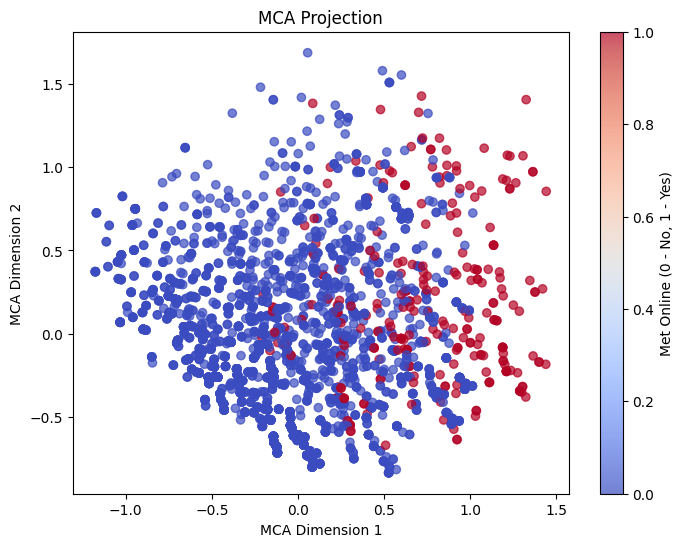

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(mca_result[0], mca_result[1], c=df['q24_met_online'].astype(int), cmap='coolwarm', alpha=0.7)
plt.xlabel("MCA Dimension 1")
plt.ylabel("MCA Dimension 2")
plt.title("MCA Projection")
plt.colorbar(label="Met Online (0 - No, 1 - Yes)")
plt.show()

In [49]:
# Визначаємо кількість кластерів (наприклад, 3)
kmodes = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1, random_state=42)

# Навчання моделі
clusters = kmodes.fit_predict(df_cleaned)

# Додаємо кластери до DataFrame
df_cleaned['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 215, cost: 7652.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 453, cost: 7561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 356, cost: 7572.0
Run 3, iteration: 2/100, moves: 57, cost: 7572.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 614, cost: 7617.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 740, cost: 7731.0
Run 5, iteration: 2/100, moves: 8, cost: 7731.0
Best run was number 2


C:\Users\olyas\AppData\Local\Temp\ipykernel_24956\2173372925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = clusters


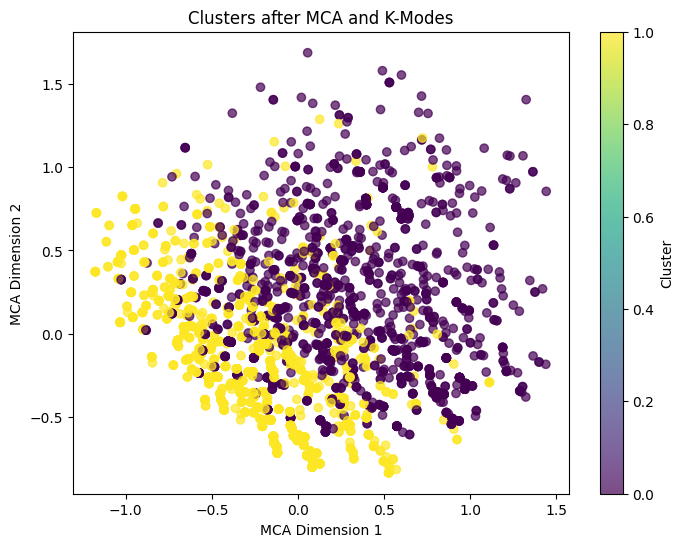

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(df_mca['MCA_1'], df_mca['MCA_2'], c=df_cleaned['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("MCA Dimension 1")
plt.ylabel("MCA Dimension 2")
plt.title("Clusters after MCA and K-Modes")
plt.colorbar(label="Cluster")
plt.show()

In [51]:
df_cleaned.groupby("Cluster").mean()

,ppagecat,ppeducat,ppincimp,qflag,glbstatus,married,q24_met_online
Cluster,,,,,,,
0,3.533747,2.946281,11.840220,1.0,0.350551,0.292011,0.137741
1,3.836032,2.863698,12.296221,1.0,0.116059,0.982456,0.047233


In [52]:
for cluster in df_cleaned['Cluster'].unique():
    print(f"Cluster {cluster}")
    print(df_cleaned[df_cleaned['Cluster'] == cluster].head(5))
    print("\n")

Cluster 0
    ppagecat  ppeducat  ppincimp  qflag  glbstatus  married  q24_met_online  \
0          4         4         7      1          1        0             1.0   
3          2         3        11      1          1        0             1.0   
6          4         4        17      1          1        0             0.0   
9          4         3        14      1          1        0             1.0   
10         6         4        17      1          1        0             0.0   

    Cluster  
0         0  
3         0  
6         0  
9         0  
10        0  


Cluster 1
    ppagecat  ppeducat  ppincimp  qflag  glbstatus  married  q24_met_online  \
1          2         4        11      1          1        1             0.0   
7          5         4         6      1          1        1             0.0   
12         2         4        14      1          1        1             0.0   
24         6         4        14      1          1        1             0.0   
26         6         1  